In [2]:
import numpy as np

N classes of jobs  
 1 =< j =< N  
Reward r[j]  
r[1] > r[2] ...
P[j] is the prob that a job is of class j  
    sum(p[j]) = 1  
The goal is to maximize the rewards  

### Admission control   
s[t] is the state of the sys at t
s[t] = r[t] the reward of the job t  
The action set is A = {0,1} ADMIT OR DO NOT ADMIT  

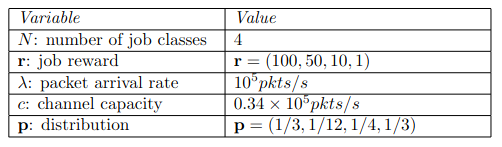

In [66]:
N = 4 # Number of jobs
l = 10**5 # Lambda : Packet arrival rate
c = 0.34 * 10**5 # Channel capacity
s = 1000 # States of the system
p = np.array([1/3, 1/12, 1/4, 1/3]) # Probability at t (N,)
r = np.array([100, 50, 10, 1]) # Reward

nb_paquets = np.random.poisson(l, s) # Number of packets (s,)

In [67]:
nb_paquets.shape

(1000,)

In [68]:
alpha = 1.75

In [69]:
c = int(c)
l = int(l)

In [83]:
policies = []
for eps in range(s):
    current_capacity = 0
    current_reward = 0
    print('.' * 100)
    print(f"SECONDE {eps}")
    print('.' * 100)
    
    optimal_policy = [0] * N

    for j in range(N):
        print('     ' + '.' * 100)
        print('     ' + f"CLASSE {j}")
        print('     ' + '.' * 100)
        # Calculate packet arrival for each class j
        arrival = (nb_paquets * np.expand_dims(p, axis=1)).T # shape (N, s)
        print('     ' + 'arrival')
        print('     ' + '_________________________________________________________')
        print(arrival)
        print('     ' + '_________________________________________________________')
        print('     ' + '_________________________________________________________')
        
        if current_capacity + arrival[eps][j] <= c:
            # If adding a packet of class j does not make us exceed the capacity, optimal_policy[j] = 1
            optimal_policy[j] = 1
            print(f"{current_capacity} + {arrival[eps][j]} <= {c} ")

            current_capacity += arrival[eps][j]
            current_reward += current_reward
            print(f"current_capacity = {current_capacity} ")
            
        else:         
            # If adding a packet of class j makes us exceed the capacity, we add a fraction of j
            remaining_capacity = c - current_capacity
            print(f"remaning capacity = {remaining_capacity}")
            optimal_policy[j] = remaining_capacity / arrival[eps][j]
            print(f" remaining-capacity / arrival[{eps}][{j}] = {remaining_capacity} / {arrival[eps][j]} = {remaining_capacity / arrival[eps][j]}")

            current_capacity += arrival[eps][j] * optimal_policy[j]
            remaining_capacity = c - current_capacity
            
            print(f" remaining-capacity = {remaining_capacity}")
            break
            
    policies.append(optimal_policy)

all_sols = np.sum(policies, axis=1)

....................................................................................................
SECONDE 0
....................................................................................................
     ....................................................................................................
     CLASSE 0
     ....................................................................................................
     arrival
     _________________________________________________________
[[33355.33333333  8338.83333333 25016.5        33355.33333333]
 [33366.          8341.5        25024.5        33366.        ]
 [33436.          8359.         25077.         33436.        ]
 ...
 [33245.66666667  8311.41666667 24934.25       33245.66666667]
 [33304.33333333  8326.08333333 24978.25       33304.33333333]
 [33321.33333333  8330.33333333 24991.         33321.33333333]]
     _________________________________________________________
     __________________________________

In [81]:
print("ALL POLICY RESULTS (alpha)")
print(all_sols)

ALL POLICY RESULTS (alpha)
[1.07730898 1.07600551 1.06747219 1.06564826 1.09667346 1.08482009
 1.06265247 1.09239997 1.08293972 1.10710691 1.08240862 1.06560775
 1.0727505  1.09424798 1.09963726 1.06840505 1.08825828 1.10190417
 1.08490188 1.09375502 1.07983681 1.07938809 1.10421487 1.07079999
 1.09178434 1.08973357 1.09511096 1.09852533 1.05570632 1.09593318
 1.09067667 1.07092184 1.08208186 1.06994723 1.08318488 1.09198953
 1.06649922 1.08077535 1.08167349 1.08895481 1.07918416 1.05578695
 1.09014356 1.061884   1.07698303 1.05731958 1.10570169 1.05131668
 1.07238464 1.07804254 1.06950069 1.09030758 1.08289886 1.0788987
 1.05554506 1.08649753 1.06564826 1.07747197 1.07331976 1.0895286
 1.1024816  1.07466219 1.05590791 1.09367287 1.06702619 1.07250659
 1.06645869 1.07067815 1.08449294 1.09170227 1.07951046 1.05340963
 1.08936465 1.08159182 1.07959204 1.08895481 1.08032643 1.07873559
 1.07344176 1.07955125 1.08482009 1.07287247 1.09860768 1.07169374
 1.07694229 1.07360444 1.08355269 1.0

Task 2: Decreasing stepsizes. Implement the version of the Robbins-Monro
algorithm tailored for the problem using decreasing stepsizes using the standard
stepsize n =  0 /nγ , γ ∈ (1/2, 1] where 0 ≥ 0; change the stepsize function, i.e., 0
and γ in order to trade-off convergence speed for noise rejection. Study their effect
on the behaviour of the algorithm.

In [22]:
n = 20

In [42]:
# we want to estimate x[i] here
# to do so we randomly initialise the step size epsilon and gamma
gamma = np.random.uniform(0.5, 1)
epsilon = [np.random.uniform(0.5, 1)] # step size
# I will give a random value to the noisy measures (samples) we have
y = np.random.rand(n)
x = [2] # x is the initial estimate, I'll start with 2

# We then follow the iteration formula
for i in range(1, n+1):
    epsilon.append((epsilon[0]/(i ** gamma)))
    x.append((x[i-1] - (epsilon[i-1] * y[i-1])))
    

In [43]:
print(epsilon)

[0.8554532887802718, 0.8554532887802718, 0.5957122156786526, 0.4820631335335133, 0.41483626115314487, 0.3692177387551825, 0.33569442205745603, 0.30973692167160133, 0.2888796285157109, 0.27165114420623765, 0.2571122469297169, 0.2446317027356256, 0.23376760669182162, 0.2242001789046149, 0.2156915758072074, 0.20806075847140518, 0.20116717747720567, 0.19489983898900154, 0.18916977365003146, 0.1839047241028444, 0.17904531820200859]


In [44]:
print(x)

[2, 1.2461661625078992, 0.5195647617466835, 0.28193072393423235, -0.10215076776046622, -0.5081049092213634, -0.6733982341270315, -0.8701137702741861, -0.9996032813043476, -1.0052762399883723, -1.1140591763320942, -1.3504875605982314, -1.4455996079969868, -1.5303379641865864, -1.5473878322664403, -1.6436461494635002, -1.8407505344181345, -1.858685174679657, -1.9214335040221533, -2.059942711542175, -2.228880682271312]
